In [2]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.templates
from plotly.offline import init_notebook_mode, iplot # plotly offline mode
init_notebook_mode(connected=True)

In [3]:
AqarData = pd.read_csv('AqarRep.csv')

In [3]:
# Display the first few rows
print(AqarData.head())

# Display data types and missing values
print(AqarData.info())
print(AqarData.isnull().sum())

   yearnumber  quarternumber quarternamear  quarterid     region_ar city_ar  \
0        2023              1   الربع الأول      20231  منطقة الرياض  الرياض   
1        2018              3  الربع الثالث      20183  منطقة الرياض  الرياض   
2        2022              2  الربع الثانى      20222  منطقة الرياض  الرياض   
3        2021              3  الربع الثالث      20213  منطقة الرياض  الرياض   
4        2020              4  الربع الرابع      20204  منطقة الرياض  الرياض   

  district_ar typecategoryar  deed_counts  RealEstatePrice_SUM  \
0     الأندلس           أخرى            1             120000.0   
1     الأندلس           أخرى            1            1000000.0   
2     الأندلس           أخرى            1             167177.0   
3     الأندلس           أخرى            1             475000.0   
4     الأندلس           أخرى            1            1000000.0   

   Meter_Price_W_Avg_IQR  
0                    NaN  
1                    NaN  
2                    NaN  
3                   

In [4]:
# Summary statistics
print(AqarData.describe())


         yearnumber  quarternumber     quarterid   deed_counts  \
count  32730.000000   32730.000000  32730.000000  32730.000000   
mean    2020.808280       2.448029  20210.530828     58.224809   
std        1.687726       1.087204     16.799506   1108.821263   
min     2018.000000       1.000000  20181.000000      1.000000   
25%     2019.000000       1.000000  20194.000000      2.000000   
50%     2021.000000       2.000000  20213.000000      6.000000   
75%     2022.000000       3.000000  20224.000000     18.000000   
max     2023.000000       4.000000  20233.000000  70678.000000   

       RealEstatePrice_SUM  Meter_Price_W_Avg_IQR  
count         3.273000e+04           1.632000e+04  
mean          5.247090e+07           3.501168e+03  
std           6.657379e+08           1.126499e+05  
min           1.000000e+00           9.500000e-04  
25%           1.520000e+06           9.667075e+02  
50%           6.153582e+06           2.163789e+03  
75%           2.325657e+07           3.49

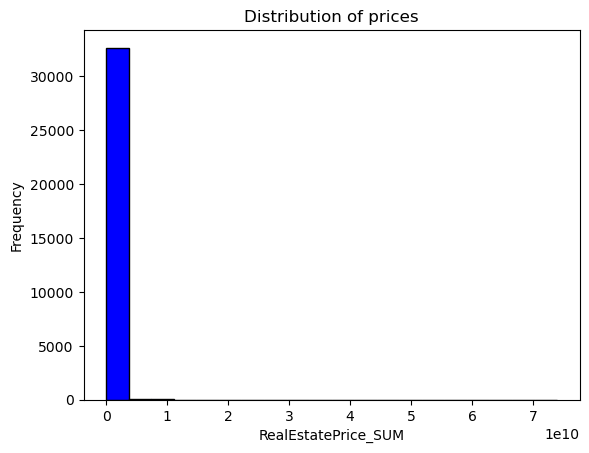

In [7]:
plt.hist(AqarData['RealEstatePrice_SUM'], bins=20, color='blue', edgecolor='black')
plt.title('Distribution of prices')
plt.xlabel('RealEstatePrice_SUM')
plt.ylabel('Frequency')
plt.show()

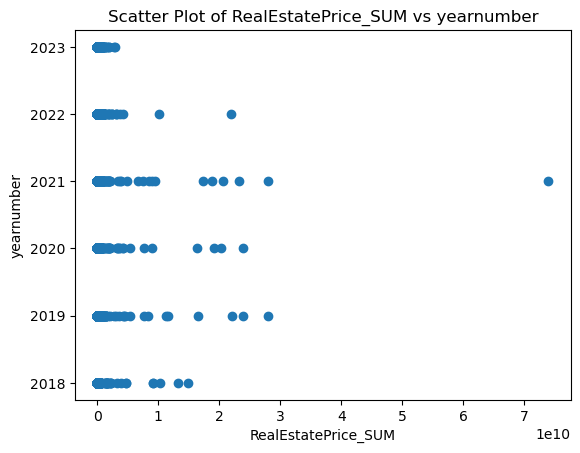

In [8]:
# Scatter plot of two variables
plt.scatter(AqarData['RealEstatePrice_SUM'], AqarData['yearnumber'])
plt.title('Scatter Plot of RealEstatePrice_SUM vs yearnumber')
plt.xlabel('RealEstatePrice_SUM')
plt.ylabel('yearnumber')
plt.show()

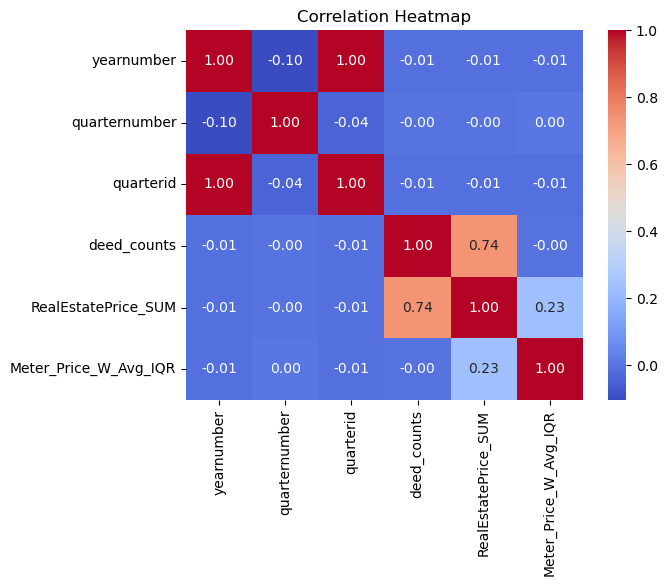

In [9]:
#Correlation heatmap
correlation_matrix = AqarData.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

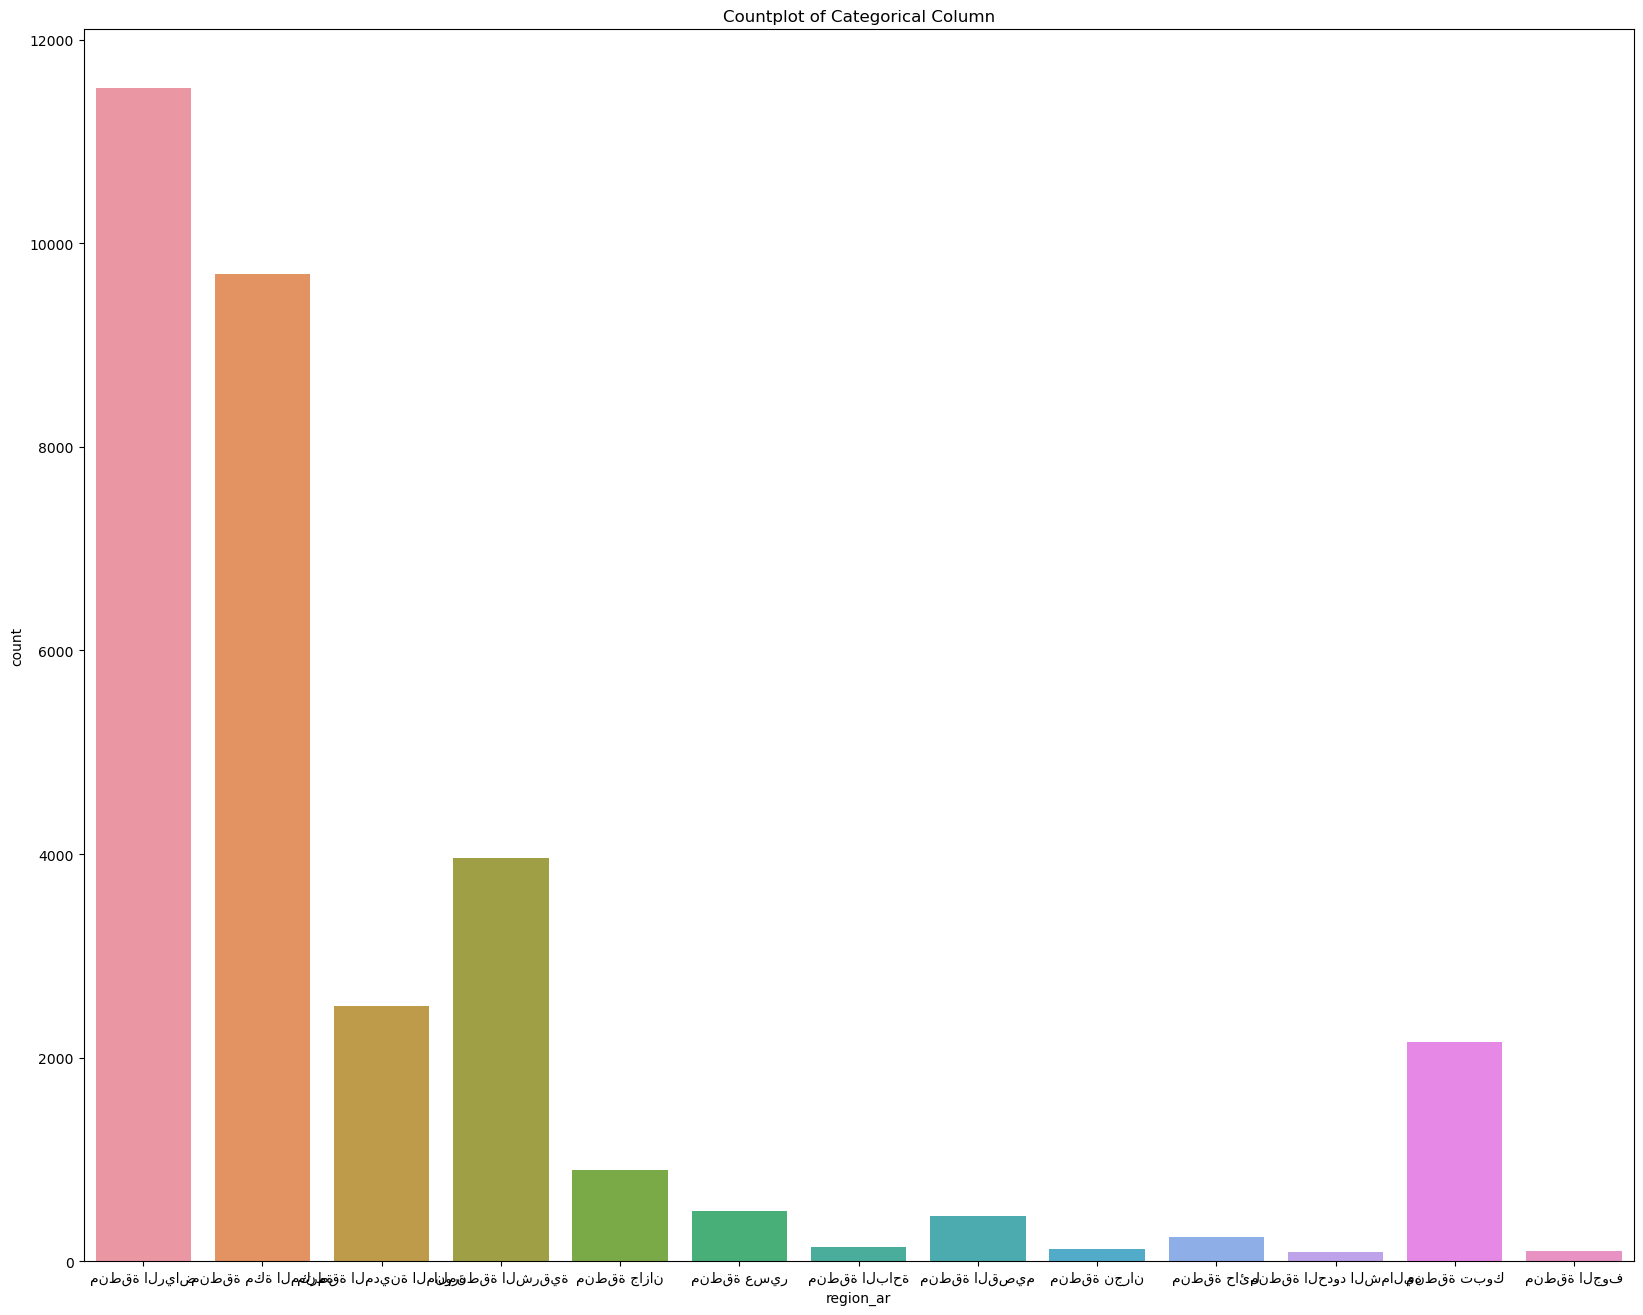

In [16]:
#Countplot of a categorical variable
plt.figure(figsize=(20, 16))
sns.countplot(x='region_ar', data=AqarData)
plt.title('Countplot of Categorical Column')
plt.show()

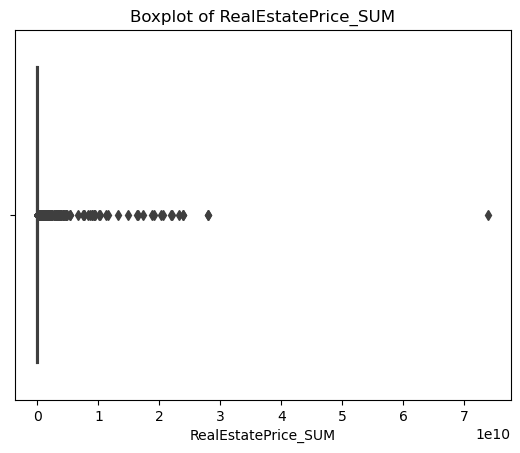

In [17]:
# Boxplot to identify outliers in a numerical column
sns.boxplot(x=AqarData['RealEstatePrice_SUM'])
plt.title('Boxplot of Numeric Column')
plt.show()

# Regression

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


Mean Squared Error: 3.138514627755522e+17


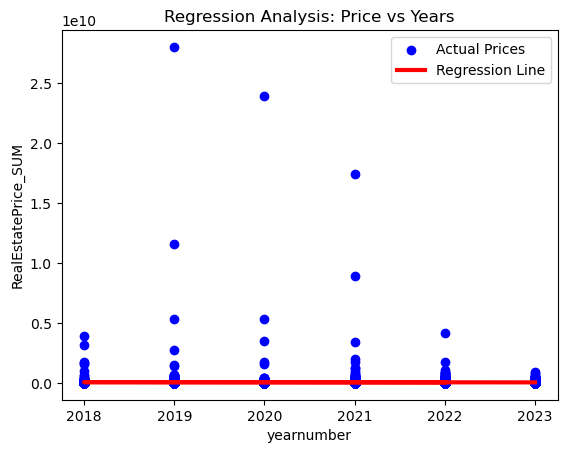

In [22]:

X = AqarData[['yearnumber']]  # Feature
y = AqarData['RealEstatePrice_SUM']     # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Plot the regression line
plt.scatter(X_test, y_test, color='blue', label='Actual Prices')
plt.plot(X_test, y_pred, color='red', linewidth=3, label='Regression Line')
plt.xlabel('yearnumber')
plt.ylabel('RealEstatePrice_SUM')
plt.title('Regression Analysis: Price vs Years')
plt.legend()
plt.show()